# -- EMG Signal Processing --
Load necessary libraries to plot sound file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# -- Time Domain --
Plotting the file in the time domain, as well as the frequency spectrum.

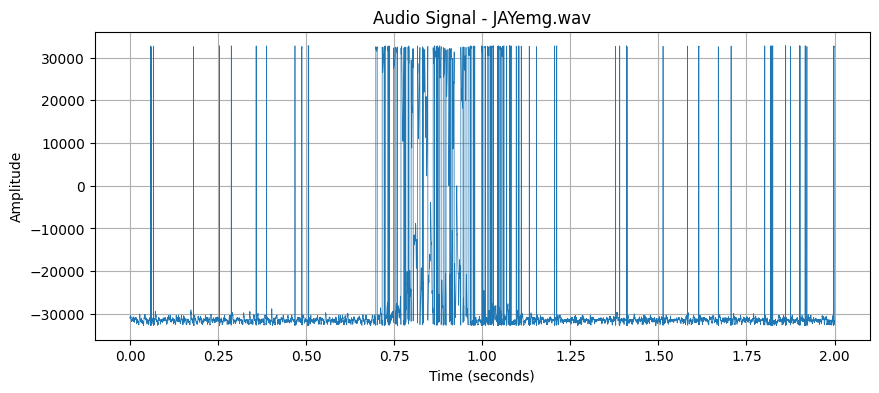

In [ ]:
# Load the audio file
audio_file = "JAYemg.wav"

# Open the audio file
with wave.open(audio_file, "rb") as wf:
    # Read the audio data
    audio_data = wf.readframes(-1)
    audio_data = np.frombuffer(audio_data, dtype=np.int16)

    # Get the sample rate (frames per second)
    sample_rate = wf.getframerate()

# Create a time vector
time_vector = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))

# Plot the audio signal
plt.figure(figsize=(10, 4))
plt.plot(time_vector, audio_data, lw=0.5)
plt.title("Audio Signal - JAYemg.wav")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Play audio for reference using the core Python libraries

In [ ]:
from IPython.display import Audio

# Load the audio file
audio_file = "JAYemg.wav"

# Play the audio
Audio(audio_file)

# -- Frequency Spectrum --

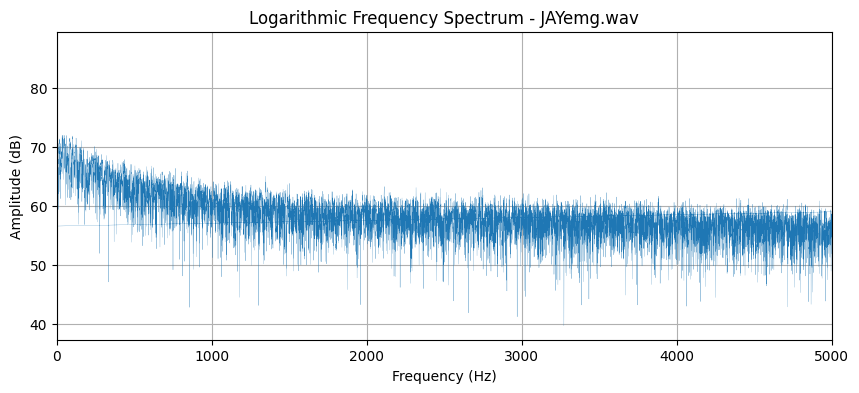

In [ ]:
# Compute the FFT of the audio data
frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
magnitude_spectrum = np.abs(np.fft.fft(audio_data))

# Calculate the logarithm of the magnitude spectrum (add a small constant to avoid log(0))
log_magnitude_spectrum = 10 * np.log10(magnitude_spectrum + 1e-9)

# Plot the logarithmic frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies, log_magnitude_spectrum, lw=0.15)
plt.title("Logarithmic Frequency Spectrum - JAYemg.wav")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xlim(0, sample_rate/2)  # Show the positive frequencies only
plt.show()

# -- Fourth Order Butterworth Filtering --
Load necessary operators from libraries for signal filtering.

In [ ]:
from scipy.signal import butter, lfilter
from scipy.io import wavfile

According to [natus](https://natus.com/education/insights/how-reduce-noise-interference-nerve-conduction-studies-and-emg-signals-more-reproducible-test#:~:text=A%20sampling%20rate%20of%2048,10%20kHz%20may%20appear%20adequate.) our filter for surface EMG should be within the range of low 1-50Hz and a high 0.5-1 kHz

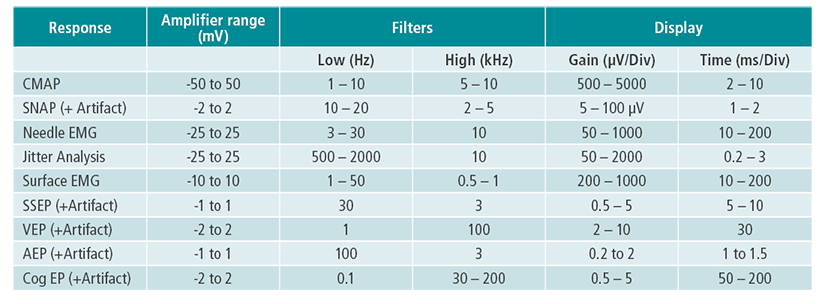




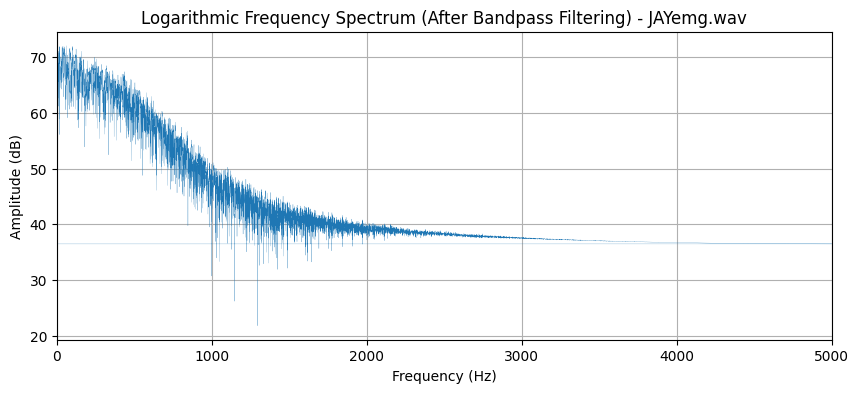

In [ ]:
# Define the bandpass filter parameters
lowcut = 10  # Lower cutoff frequency (Hz)
highcut = 1000  # Upper cutoff frequency (Hz)
order = 4  # Filter order

# Normalize the cutoff frequencies
lowcut /= sample_rate
highcut /= sample_rate

# Create the bandpass Butterworth filter
b, a = butter(order, [lowcut, highcut], btype='band')

# Apply the filter to the audio data
filtered_audio = lfilter(b, a, audio_data)

# Compute the FFT of the filtered audio data
frequencies = np.fft.fftfreq(len(filtered_audio), 1 / sample_rate)
magnitude_spectrum = np.abs(np.fft.fft(filtered_audio))

# Calculate the logarithm of the magnitude spectrum (add a small constant to avoid log(0))
log_magnitude_spectrum = 10 * np.log10(magnitude_spectrum + 1e-9)

# Plot the logarithmic frequency spectrum of the filtered audio
plt.figure(figsize=(10, 4))
plt.plot(frequencies, log_magnitude_spectrum, lw=0.15)
plt.title("Logarithmic Frequency Spectrum (After Bandpass Filtering) - JAYemg.wav")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xlim(0, sample_rate / 2)  # Show the positive frequencies only
plt.show()

In [ ]:
# Play the filtered audio
Audio(filtered_audio, rate=sample_rate)

# -- Fourth Order Chebyshev Filtering --
Trying out a chebyshev filter as it has a much sharper cutoff as opposed to the previous butterworth. I start off by loading the necessary libraries for filtering.

In [ ]:
from scipy.signal import cheby1, lfilter
from scipy.io import wavfile

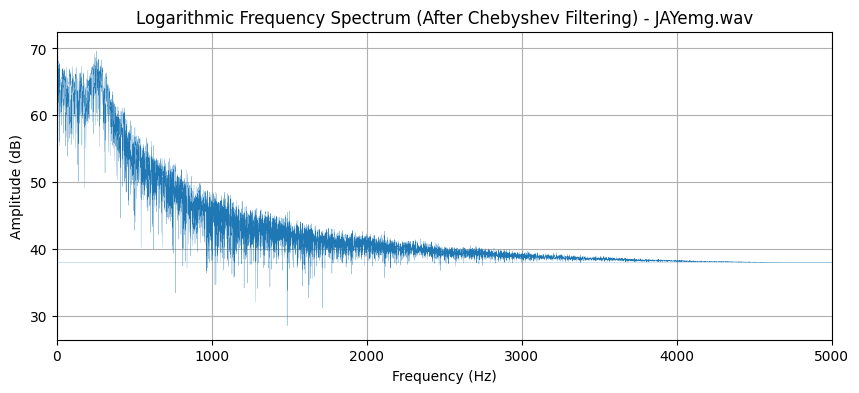

In [ ]:
# Define the Chebyshev Type I filter parameters
lowcut = 10  # Lower cutoff frequency (Hz)
highcut = 750  # Upper cutoff frequency (Hz)
order = 2  # Filter order
rp = 10  # Passband ripple (dB)

# Normalize the cutoff frequencies
lowcut /= sample_rate
highcut /= sample_rate

# Design the Chebyshev Type I filter
b, a = cheby1(order, rp, [lowcut, highcut], btype='band')

# Apply the filter to the audio data
filtered_audio = lfilter(b, a, audio_data)

# Compute the FFT of the filtered audio data
frequencies = np.fft.fftfreq(len(filtered_audio), 1 / sample_rate)
magnitude_spectrum = np.abs(np.fft.fft(filtered_audio))

# Calculate the logarithm of the magnitude spectrum (add a small constant to avoid log(0))
log_magnitude_spectrum = 10 * np.log10(magnitude_spectrum + 1e-9)

# Plot the logarithmic frequency spectrum of the filtered audio
plt.figure(figsize=(10, 4))
plt.plot(frequencies, log_magnitude_spectrum, lw=0.15)
plt.title("Logarithmic Frequency Spectrum (After Chebyshev Filtering) - JAYemg.wav")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xlim(0, sample_rate / 2)  # Show the positive frequencies only
plt.show()

In [ ]:
# Play the filtered audio
Audio(filtered_audio, rate=sample_rate)

# -- Fourth Order Elliptic Filtering --

In [ ]:
from scipy.signal import ellip, lfilter
from scipy.io import wavfile

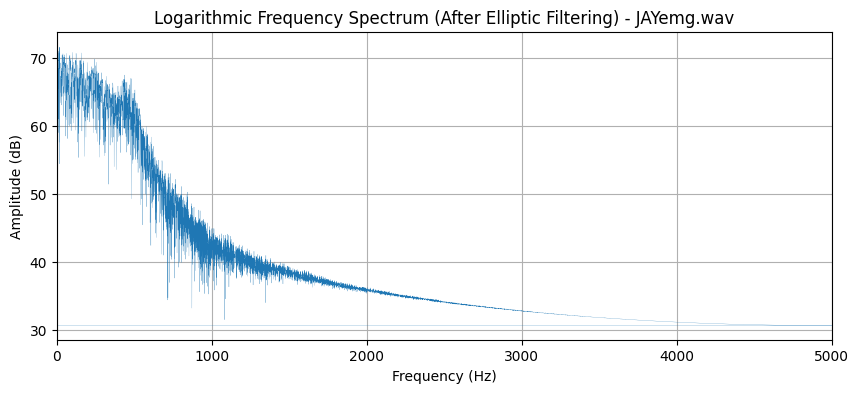

In [ ]:
# Define the elliptic filter parameters
lowcut = 10  # Lower cutoff frequency (Hz)
highcut = 1000  # Upper cutoff frequency (Hz)
rp = 3  # Passband ripple (dB)
rs = 400  # Stopband attenuation (dB)

# Normalize the cutoff frequencies
lowcut /= sample_rate
highcut /= sample_rate

# Design the elliptic filter
b, a = ellip(N=4, rp=rp, rs=rs, Wn=[lowcut, highcut], btype='band')

# Apply the filter to the audio data
filtered_audio = lfilter(b, a, audio_data)

# Compute the FFT of the filtered audio data
frequencies = np.fft.fftfreq(len(filtered_audio), 1 / sample_rate)
magnitude_spectrum = np.abs(np.fft.fft(filtered_audio))

# Calculate the logarithm of the magnitude spectrum (add a small constant to avoid log(0))
log_magnitude_spectrum = 10 * np.log10(magnitude_spectrum + 1e-9)

# Plot the logarithmic frequency spectrum of the filtered audio
plt.figure(figsize=(10, 4))
plt.plot(frequencies, log_magnitude_spectrum, lw=0.15)
plt.title("Logarithmic Frequency Spectrum (After Elliptic Filtering) - JAYemg.wav")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xlim(0, sample_rate / 2)  # Show the positive frequencies only
plt.show()

In [ ]:
# Play the filtered audio
Audio(filtered_audio, rate=sample_rate)

In [37]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file_path = '/content/scope_0.csv'  # Update the file path
df = pd.read_csv(file_path)

#df = df.drop(0)

# Display the first few rows of the DataFrame
df.head()




,second,Volt
0,-0.5000,0.103254
1,-0.4995,0.119334
2,-0.4990,0.312299
3,-0.4985,-0.121872
4,-0.4980,0.135415


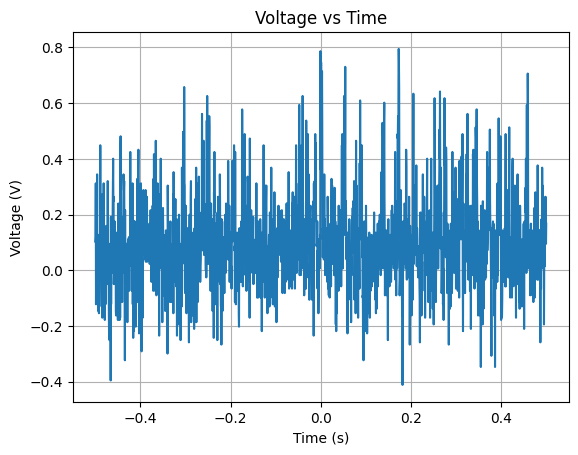

In [38]:
plt.plot(df['second'], df['Volt'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.grid(True)
plt.show()

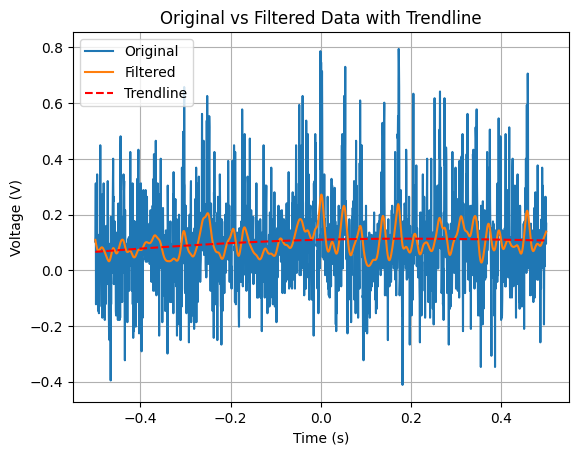

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import cheby2, filtfilt

# Extract time and voltage data
time = df['second'].values
voltage = df['Volt'].values

# Define filter parameters
fs = 1 / (time[1] - time[0])  # Sampling frequency (Hz)
f_cutoff = 750  # Cutoff frequency (Hz)
order = 2  # Filter order

# Design Chebyshev type II low-pass filter
b, a = cheby2(order, 70, f_cutoff / (fs / 2), 'low')

# Apply the filter to the voltage data
filtered_voltage = filtfilt(b, a, voltage)

# Fit a polynomial to the filtered voltage data (trendline)
coefficients = np.polyfit(time, filtered_voltage, 4)
trendline = np.polyval(coefficients, time)

# Plot the original and filtered data with trendline
plt.plot(time, voltage, label='Original')
plt.plot(time, filtered_voltage, label='Filtered')
plt.plot(time, trendline, label='Trendline', linestyle='--', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Original vs Filtered Data with Trendline')
plt.legend()
plt.grid(True)
plt.show()